In [1]:
# Librerias

# Tratamiento de datos
import pandas as pd
# Mapa
import smopy
# Machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Importamos los datos a un dataframe de pandas
dataset = pd.read_excel('Real estate valuation data set.xlsx', engine='openpyxl')
# Visualizamos las primeras filas del dataframe
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Numero de registros
dataset.shape[0]

414

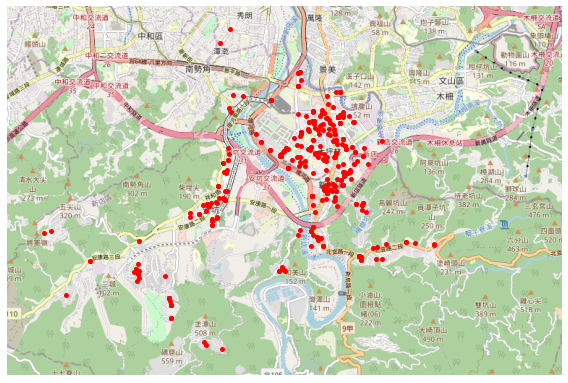

In [5]:
# Visualizamos los datos en un mapa
#lat_min, lon_min, lat_max, lon_max
map = smopy.Map((24.94, 121.48, 25.00, 121.56), z=13)
x, y = map.to_pixels(dataset['X5 latitude'],dataset['X6 longitude'])
ax = map.show_mpl(figsize=(8, 10))
ax.plot(x, y, 'or', ms=3, mew=2);

In [6]:
# Separamos la variable objetivo y las predictoras
X = dataset[[
    'X2 house age',
    'X3 distance to the nearest MRT station',
    'X4 number of convenience stores',
    'X5 latitude',
    'X6 longitude'
]]

y = dataset['Y house price of unit area']

In [7]:
# Correlacion entre variables
dataset.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
# Dividimos el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [9]:
# Creamos el objeto clasificador
rf = RandomForestRegressor()

# Optimización de hiperparámetros
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'n_estimators': [10, 50, 100, 200, 500, 1000]}

# Creamos el objeto gridSearch con las combinaciones de los hiperparámetros
grid_obj = GridSearchCV(rf, param_grid,cv=4)
grid_res = grid_obj.fit(X_train, y_train)

In [10]:
print("Best Score:" + str(grid_res.best_score_))
print("Best Parameters: " + str(grid_res.best_params_))

Best Score:0.6833429848382013
Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [11]:
# Aplicamos el modelo con los parametros anteriores
rf = RandomForestRegressor(max_depth=5,n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [12]:
# Usamos el modelo para predecir los nuevos valores en los conjuntos de entrenamiento y test
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

In [13]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.860
Accuracy on test set: 0.761


In [14]:
# Dando el modelo por aceptable, predecimos valores para todo el dataframe
y_2_pred = rf.predict(X)
dataset['Y predicted'] = y_2_pred

In [15]:
# Calculammos la diferencia entre el valor de venta y el predecido por el modelo
dataset['Score_diff'] = dataset['Y house price of unit area'] - dataset['Y predicted']

In [17]:
# Guardamos los casos en los que el precio de venta es menos
result_df = dataset.loc[dataset['Score_diff'] < 0]

In [21]:
# Numero de viviendas por debajo del precio esperado
result_df.shape[0]

212

In [22]:
# Aplicamos una diferencia mayor
result_df2 = dataset.loc[dataset['Score_diff'] < -10]

In [23]:
# Numero de viviendas por debajo del precio esperado
result_df2.shape[0]

17

Lowered zoom level to keep map size reasonable. (z = 14)


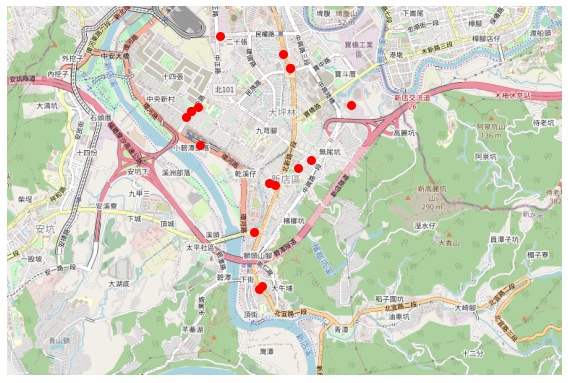

In [24]:
# Visualizacion de las viviendas d eoportunidad
# lat_min, lon_min, lat_max, lon_max
map = smopy.Map((24.95, 121.52, 24.98, 121.56), z=16)
x, y = map.to_pixels(result_df2['X5 latitude'],result_df2['X6 longitude'])
ax = map.show_mpl(figsize=(8, 10))
ax.plot(x, y, 'or', ms=5, mew=4);